<a href="https://colab.research.google.com/github/HawraaML/PythonTutorial_for_MachineLearning/blob/main/7_final_project(college_attending_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this code we will work on classification problem using :


1.  Logistic Regression
2.  SVM
3.  Decision Tree
4.  KNN
________________________________________________________

# 1- Upload data from Kaggle

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle datasets download -d charleyhuang1022/college-plan

  0% 0.00/60.8k [00:00<?, ?B/s]
100% 60.8k/60.8k [00:00<00:00, 83.5MB/s]


In [6]:
!unzip \*.zip && rm *.zip

Archive:  college-plan.zip
  inflating: college.csv             


In [7]:
# here we will read data using pandas
import pandas as pd

df = pd.read_csv('college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [ ]:
df.tail()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
7995,7995,female,55330,125,encourage,plan
7996,7996,female,48240,97,encourage,not plan
7997,7998,male,47300,64,not encourage,not plan
7998,7999,male,24000,103,not encourage,not plan
7999,8000,male,79200,101,encourage,plan


# 2- Data preprocessing

In [8]:
df.shape

(8000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [ ]:
# remove duplicate values
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       StudentID  Gender  Parent_income   IQ      Encourage      Plan
0          4558    male          53900  118      encourage      plan
1          4561  female          24900   87  not encourage  not plan
2          4563  female          65800   93  not encourage  not plan
3          4565    male          11440  117      encourage      plan
4          4567  female          16700  102  not encourage  not plan
...         ...     ...            ...  ...            ...       ...
7995       7995  female          55330  125      encourage      plan
7996       7996  female          48240   97      encourage  not plan
7997       7998    male          47300   64  not encourage  not plan
7998       7999    male          24000  103  not encourage  not plan
7999       8000    male          79200  101      encourage      plan

[8000 rows x 6 columns]>

In [ ]:
df.shape

(8000, 6)

In [ ]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [9]:
# here we will convert categorical values of feature into numerical value
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['male','female'],['not encourage','encourage']])
df[['Gender','Encourage']] = oe.fit_transform(df[['Gender','Encourage']])

# show result
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,0.0,53900,118,1.0,plan
1,4561,1.0,24900,87,0.0,not plan
2,4563,1.0,65800,93,0.0,not plan
3,4565,0.0,11440,117,1.0,plan
4,4567,1.0,16700,102,0.0,not plan


In [10]:
# here we will convert categorical values of target into numerical value
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
df['Plan'] = label_encode.fit_transform(df['Plan'])

# show result
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,0.0,53900,118,1.0,1
1,4561,1.0,24900,87,0.0,0
2,4563,1.0,65800,93,0.0,0
3,4565,0.0,11440,117,1.0,1
4,4567,1.0,16700,102,0.0,0


In [11]:
# see the relations between our data
df.corr()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
StudentID,1.000000,-0.018016,0.013537,0.024428,0.015381,0.008579
Gender,-0.018016,1.000000,-0.012110,-0.012066,-0.118439,-0.082747
Parent_income,0.013537,-0.012110,1.000000,0.280201,0.409383,0.501489
IQ,0.024428,-0.012066,0.280201,1.000000,0.301454,0.353742
Encourage,0.015381,-0.118439,0.409383,0.301454,1.000000,0.541327
Plan,0.008579,-0.082747,0.501489,0.353742,0.541327,1.000000


In [14]:
# split the features from the target

# features (we will remove target and features that not affect the output)
X = df.drop(['StudentID','Gender','IQ','Plan'], axis=1)

# target
y = df['Plan']


In [15]:
# put all numbers of features in same range using standardization
from sklearn.preprocessing import StandardScaler

# then we will fit the standardscaler
scaler = StandardScaler().fit(X)
X_sscaled = scaler.fit_transform(X)

# Show the first row
print(X_sscaled[0])

[0.73853035 0.96680078]


# 3- Data Visualization

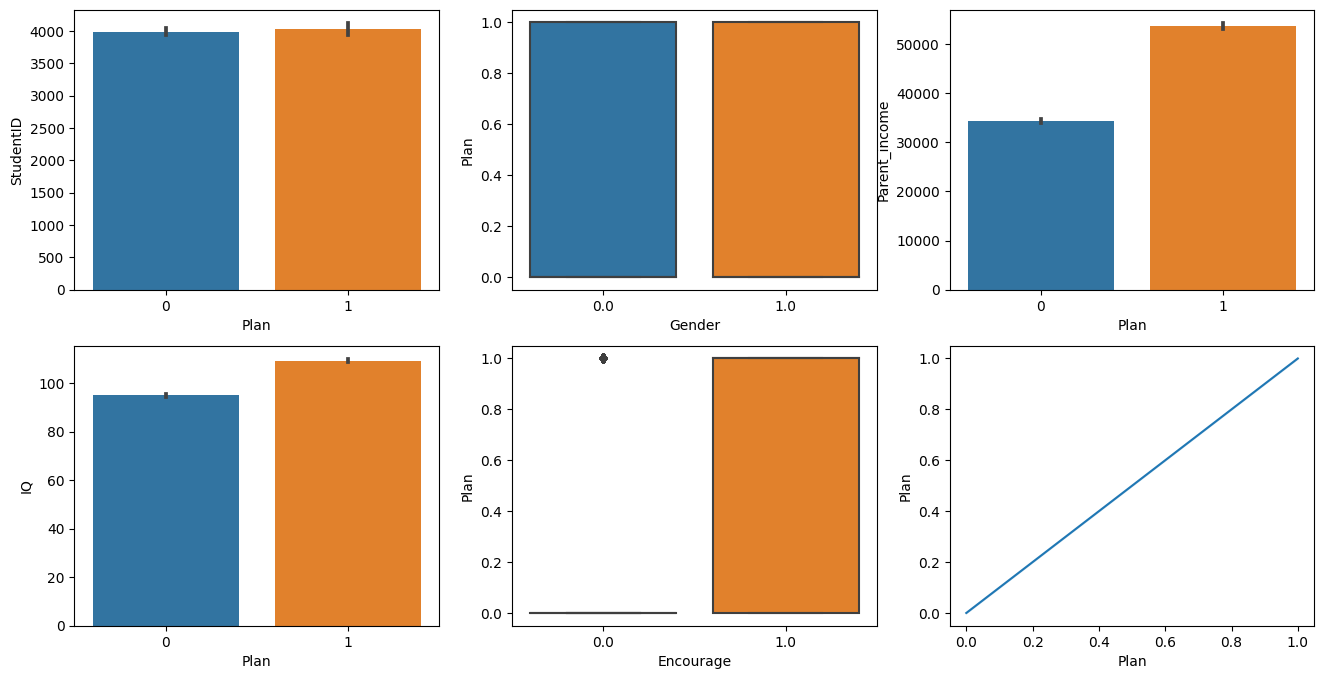

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Use the axes for plotting
sns.barplot(x = df['Plan'], y = df['StudentID'], ax = axes[0,0])
sns.boxplot(x = df['Gender'], y = df['Plan'], ax = axes[0,1])
sns.barplot(x = df['Plan'], y = df['Parent_income'], ax = axes[0,2])

sns.barplot(x = df['Plan'], y = df['IQ'], ax = axes[1,0])
sns.boxplot(x = df['Encourage'], y = df['Plan'], ax = axes[1,1])
sns.lineplot(x = df['Plan'], y = df['Plan'], ax = axes[1,2])

plt.show()

# 4- Data spliting

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_sscaled,y, test_size =.2,
                                                 random_state = 50)


In [18]:
y_train.shape

(6400,)

In [19]:
X_train.shape

(6400, 2)

# 5- Apply classification models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instnatiating the models
logistic_regression = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Training the models
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Making predictions with each model
log_reg_preds = logistic_regression.predict(X_test)
svm_preds = svm.predict(X_test)
tree_preds = tree.predict(X_test)
knn_preds = knn.predict(X_test)

# 6- Evaluate the model accuracy

In [21]:
from sklearn.metrics import classification_report

model_preds = {
    "Logistic Regression": log_reg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "K-Nearest Neighbors": knn_preds
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds)}", sep="\n\n")


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1063
           1       0.77      0.74      0.75       537

    accuracy                           0.84      1600
   macro avg       0.82      0.81      0.82      1600
weighted avg       0.84      0.84      0.84      1600

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1063
           1       0.77      0.72      0.75       537

    accuracy                           0.84      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.83      0.84      0.83      1600

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1063
           1       0.91      0.85      0.88       537

    accuracy                           0.92      1600
   macro avg       0.92      0.90      0.91 